# Modern Portfolio Theory Implementation

## Getting data from Yahoo

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import scipy.optimize as optimization

In [2]:
stocks = ['WMT']

In [3]:
start_date = '01/01/2001'
end_date = '01/01/2019'

In [4]:
data = web.DataReader(stocks, data_source = 'yahoo', start = start_date, end = end_date)
data.head(5)

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,WMT,WMT,WMT,WMT,WMT,WMT
Date,,,,,,
2001-01-02,37.584843,53.8750,55.0625,52.6875,53.125,8813600.0
2001-01-03,40.767803,58.4375,58.7500,52.9375,53.500,19957100.0
2001-01-04,39.198124,56.1875,58.1875,55.8750,57.000,13812300.0
2001-01-05,37.628464,53.9375,57.1250,53.2500,57.125,9809200.0
2001-01-08,37.628464,53.9375,54.8125,52.8750,53.000,8442100.0


In [5]:
data_adjClose = data['Adj Close'] # Adjusted close prices are more accurate reflection of stock's value.
                                  # It takes into account factors such as dividends, stock splits...
data_adjClose.head(5)

Symbols,WMT
Date,
2001-01-02,37.584843
2001-01-03,40.767803
2001-01-04,39.198124
2001-01-05,37.628464
2001-01-08,37.628464


In [6]:
data_adjClose.shift(1).head(5)

Symbols,WMT
Date,
2001-01-02,NaN
2001-01-03,37.584843
2001-01-04,40.767803
2001-01-05,39.198124
2001-01-08,37.628464


In [7]:
daily_returns = (data_adjClose/data_adjClose.shift(1))-1
daily_returns.head(5)

Symbols,WMT
Date,
2001-01-02,NaN
2001-01-03,0.084687
2001-01-04,-0.038503
2001-01-05,-0.040044
2001-01-08,0.000000


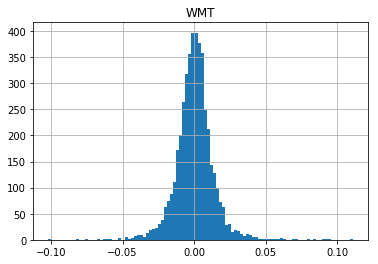

In [8]:
# We check histogram to see if returns are normally distributed because for modern portfolio theory we
# make assumption that the returns are normally distributed to use mean and variance parameters
daily_returns.hist(bins=100)
plt.show()
# We do have a gaussian bellshape

## Weights

In [9]:
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

In [10]:
start_date = '01/01/2010'
end_date = '01/01/2019'

In [11]:
# Downloading data from Yahoo finance
def download_data(stocks):
    data = web.DataReader(stocks, 'yahoo', start_date, end_date)['Adj Close']
    return data

In [12]:
def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()

In [13]:
def calculate_returns(data):
    returns = np.log(data/data.shift(1))
    return returns

In [14]:
def show_statistics(returns): # 252 trading days in a year
    print(returns.mean()*252)
    print(returns.cov()*252)

In [15]:
def initialize_weights():
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    return weights

In [16]:
dt = download_data(stocks)

In [17]:
dt.tail(5)

Symbols,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2018-12-24,144.656540,1343.959961,7.775431,6.627234,295.390015,84.116425
2018-12-26,154.843475,1470.900024,8.021178,7.077350,326.089996,88.615326
2018-12-27,153.838562,1461.640015,7.677133,6.962427,316.130005,89.771889
2018-12-28,153.917389,1478.020020,7.913050,7.192273,333.869995,90.301170
2018-12-31,155.405045,1501.969971,8.011348,7.249735,332.799988,91.300919


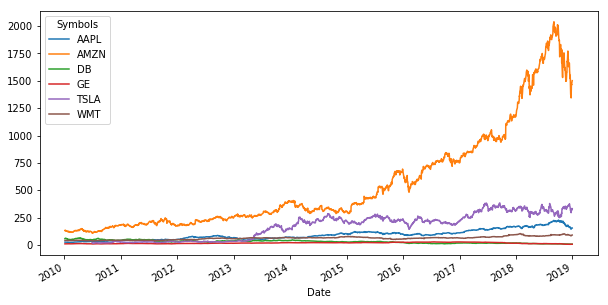

In [18]:
show_data(dt)

In [19]:
returns = calculate_returns(dt)
returns.head(5)

Symbols,AAPL,AMZN,DB,GE,TSLA,WMT
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,0.005883,0.018937,0.005165,NaN,-0.010007
2010-01-06,-0.016034,-0.018282,-0.017436,-0.005165,NaN,-0.002238
2010-01-07,-0.001850,-0.017160,0.011254,0.050484,NaN,0.000560
2010-01-08,0.006626,0.026717,0.035496,0.021310,NaN,-0.005050


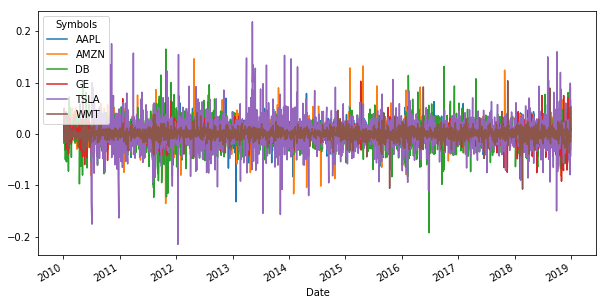

In [20]:
show_data(returns)

In [21]:
show_statistics(returns)

Symbols
AAPL    0.196552
AMZN    0.269198
DB     -0.222415
GE     -0.043970
TSLA    0.310037
WMT     0.085649
dtype: float64
Symbols      AAPL      AMZN        DB        GE      TSLA       WMT
Symbols                                                            
AAPL     0.066120  0.031289  0.033623  0.020457  0.030875  0.010373
AMZN     0.031289  0.100097  0.040516  0.023523  0.046795  0.010918
DB       0.033623  0.040516  0.161479  0.046992  0.044594  0.017598
GE       0.020457  0.023523  0.046992  0.059300  0.026597  0.011963
TSLA     0.030875  0.046795  0.044594  0.026597  0.264237  0.012466
WMT      0.010373  0.010918  0.017598  0.011963  0.012466  0.030770


In [22]:
weights = initialize_weights()
weights

array([0.18673686, 0.22524996, 0.111736  , 0.20868858, 0.11582508,
       0.15176352])

## Mean & Variance

In [23]:
def calculate_portfolio_return(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    return(portfolio_return)

In [24]:
def calculate_portfolio_variance(returns, weights): # volatility
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))) # dot product = produit scalaire
    # standard deviation in fact, sd = risk associated with portfolio
    return(portfolio_variance)

In [25]:
portfolio_return = calculate_portfolio_return(returns, weights)
print("Expected portfolio return:", portfolio_return, "({}%)".format(round(portfolio_return*100,1)))
portfolio_variance = calculate_portfolio_variance(returns, weights)
print("Expected portfolio variance:", portfolio_variance, "({}%)".format(round(portfolio_variance*100,1))) 

Expected portfolio return: 0.11222108332596128 (11.2%)
Expected portfolio variance: 0.19404465119787567 (19.4%)


## Monte-Carlo simulation

**Monte-Carlo method** solves a deterministic problem using probabilistic analog
<br>
<br>1) define a domain of possible inputs
<br>2) generate inputs randomly
<br>3) perform a deterministic computation on the inputs
<br>4) aggregate the results
<img src="MonteCarlo.png" width="200">
<br>We can calculate the area of a circle with Monte-Carlo approach:
<br>Just have to generate random points in the plane within **[0,a]**
<br>Then calculate the points inside and outside of circle: the ratio can yield the area

In [26]:
def generate_portfolios(returns, n):
    preturns = []
    pvariances = []
    
    for i in range (n):
        weights = initialize_weights()
        preturns.append(calculate_portfolio_return(returns, weights)) #add to array total return for each portfolio
        pvariances.append(calculate_portfolio_variance(returns, weights))
    
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    
    return preturns, pvariances

In [27]:
def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances, returns, c = returns/variances, marker = 'o', cmap = 'Spectral_r', edgecolors='black') # Sharpe Ratio S(x)= (Rx - Rf)/SDx, here no Rf so S = R/SD
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Return")
    plt.colorbar(label = "Sharpe Ratio")
    plt.show()

In [28]:
P = generate_portfolios(returns, 10000)

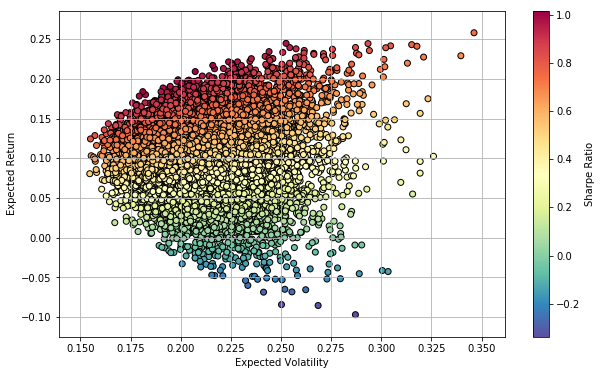

In [29]:
plot_portfolios(P[0], P[1])

## Optimization

We now need to find the portfolio with maximum Sharpe ratio
<br>Scipy can optimize functions (finding minimum/maximum)

In [30]:
def statistics(returns, weights):
    portfolio_return = calculate_portfolio_return(returns, weights)
    portfolio_volatility = calculate_portfolio_variance(returns, weights)
    return np.array([portfolio_return, portfolio_volatility, portfolio_return/portfolio_volatility])

Scipy optimization package can only find minimum. As we are looking for maximum we put a - sign before statistics
<br>**Maximizing f(x) is the same as minimizing -f(x)**

In [31]:
#l'ordre des arguments est tres important ici car dans la fonction "optimize_portfolio", x0 = weights prendra 
#la place du premier argument de la fonction "min_func_sharpe" et args = returns la seconde place
def min_func_sharpe(weights, returns): 
    return -statistics(returns, weights)[2]

[scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
<br>**f(x) = 0 is the function we want to minimize**

In [32]:
def optimize_portfolio(returns, weights):
    # On doit definir 2 contraintes (constraints & bounds)
    constraints = ({"type": "eq", "fun": lambda x: np.sum(x)-1}) # sum of weights is 1
    bounds = tuple((0,1) for x in range(len(stocks))) # the weights can be 1 at most (1 = 100% money invested in asset)
    
    optimum = optimization.minimize(fun = min_func_sharpe, x0 = weights, args = returns, method = "SLSQP", bounds = bounds, constraints = constraints)
    #fun = min_func_sharpe: function we want to minimize
    #x0 = weights: starting point of algorithm, a guess basically before finding best weights for our portfolio
    #args = returns: min_func_sharpe and statistics function need "returns" as an other parameter to "weights"
    #method = "SLSQP": Sequential Least SQuares Programming, good for our purpose
    
    return optimum

In [33]:
Optimal_portfolio = optimize_portfolio(returns, weights)
Optimal_portfolio

     fun: -1.0479887044124059
     jac: array([ 9.53674316e-05, -3.68073583e-04,  2.04507542e+00,  7.73761690e-01,
        1.88663602e-04,  2.69547105e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([3.07957641e-01, 3.24224824e-01, 0.00000000e+00, 5.03846896e-16,
       1.13359705e-01, 2.54457831e-01])

In [34]:
def print_optimal_portfolio(optimum, returns):
    print("Optimal weights:", optimum["x"].round(3)) # x contains the solutions (optimal weights)
    print("Expected return, volatility and Sharpe ratio:", statistics(returns, optimum["x"]).round(3))

In [35]:
print_optimal_portfolio(Optimal_portfolio, returns)

Optimal weights: [0.308 0.324 0.    0.    0.113 0.254]
Expected return, volatility and Sharpe ratio: [0.205 0.195 1.048]


**We should then invest:**
<br>AAPL    30.8%
<br>WMT     32.4%
<br>TSLA    0%
<br>GE      0%
<br>AMZN    11.3%
<br>DB      25.4%
<br>
<br>**With:**
<br>Expected return: 20.5%
<br>Expected volatility: 19.5%
<br>Sharpe ratio: 1.048

In [36]:
def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances, preturns, c = preturns/pvariances, marker = 'o', cmap = 'Spectral_r', edgecolors='black')
    plt.grid(True)
    plt.xlabel("Expected Volatility")
    plt.ylabel("Expected Return")
    plt.colorbar(label = "Sharpe Ratio")
    plt.plot(statistics(returns, optimum['x'])[1], statistics(returns, optimum['x'])[0], "g*", markersize = 20)
    plt.show()

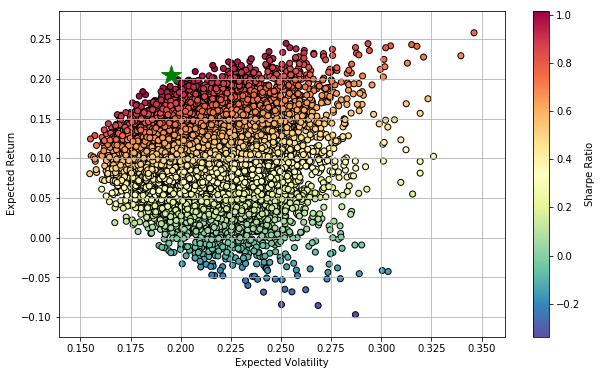

In [37]:
show_optimal_portfolio(Optimal_portfolio, returns, P[0], P[1])